# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Jim Crivello  https://github.com/jmcriv/web-scraping

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

## Before Taking the Screenshot

In [1]:
# Create and activate a Python virtual environment. 
# Before starting the project, try all these imports FIRST
# Address any errors you get running this code cell 
# by installing the necessary packages into your active Python environment.
# Try to resolve issues using your materials and the web.
# If that doesn't work, ask for help in the discussion forums.
# You can't complete the exercises until you import these - start early! 
# We also import pickle and Counter (included in the Python Standard Library).

from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

!pip list

print('All prereqs installed.')

Package                       Version
----------------------------- --------------------
absl-py                       1.4.0
alabaster                     0.7.12
anaconda-client               1.11.0
anaconda-navigator            2.3.2
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
asgiref                       3.5.2
astroid                       2.11.7
astropy                       5.1
astunparse                    1.6.3
atomicwrites                  1.4.0
attrs                         22.1.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.11.0
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
beautifulsoup4                4.11.1
b

## Question 1

1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [1]:
import requests
import pickle

response = requests.get('https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/')
text = response.text

with open('headlights.pkl', 'wb') as file:
    pickle.dump(text, file)

## Question 2

2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [2]:
from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

with open('headlights.pkl', 'rb') as f:
    article_html = pickle.load(f)

parser = 'html5lib'
soup = BeautifulSoup(article_html, parser)

article_element = soup.find('article')

print(article_element.get_text())


    
        How Laser Headlights Work
        
            
                130 Comments            
            
                by:
                Lewin Day
            
        

        
            March 22, 2021
            
                
                
            
        

        
    

    
        When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM’s prototype laser headlight assemblies undergoing testing.
The first i

## Question 3

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [6]:
from collections import Counter
import pickle
import requests
import spacy
import spacytextblob
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from spacytextblob.spacytextblob import SpacyTextBlob

nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')

doc = nlp(article_element.get_text())

def significant_tokens(token):
    return not (token.is_space or token.is_punct or token.is_stop)

frequent_tokens = [token.text.lower() for token in doc if significant_tokens(token)]

tokens = Counter(frequent_tokens)
freq_5tokens = tokens.most_common(5)

print('Token          Frequency')
for token, count in freq_5tokens:
    print(f'{token:<10} {count:>9}')

Token          Frequency
laser             35
headlights        19
headlight         11
technology        10
led               10


## Question 4

4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [21]:
frequent_lemmas = [token.lemma_.lower() for token in doc if significant_tokens(token)]
lemmas = Counter(frequent_lemmas)
freq_5lemmas = lemmas.most_common(5)

print('Lemma          Frequency')
for lemma, count in freq_5lemmas:
    print(f'{lemma:<10} {count:>9}')

Lemma          Frequency
laser             40
headlight         28
beam              12
technology        10
light             10


## Question 5

5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [22]:
def score_sentence_by_token(sentence, interesting_token):
    total_word_count = len([token for token in sentence])
    interesting_word_count = len([token.text.lower() for token in sentence if token.text in interesting_token])
    tokens_score = interesting_word_count / total_word_count
    return tokens_score

sentences = list(doc.sents)
print(score_sentence_by_token(sentences[0], frequent_tokens))

0.15


In [23]:
def score_sentence_by_lemma(sentence, interesting_lemmas):
    total_word_count = len([word for word in sentence])
    interesting_lemma_count = len([token.lemma_.lower() for token in sentence if token.lemma_ in interesting_lemmas])
    lemmas_score = interesting_lemma_count / total_word_count
    return lemmas_score

sentences = list(doc.sents)
print(score_sentence_by_lemma(sentences[0], frequent_lemmas))

0.15


## Question 6

6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

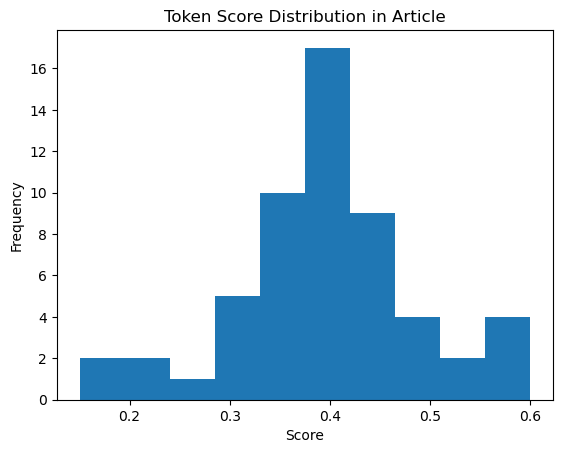

In [14]:
tokens_scores = []
for sentence in list(doc.sents):
    score = score_sentence_by_token(sentence, frequent_tokens)
    tokens_scores.append(score)

plt.hist(tokens_scores)
plt.title('Tokens Score Distribution in Article')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

# The most common range of tokens scores is 0.38 to 0.42.

## Question 7

7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

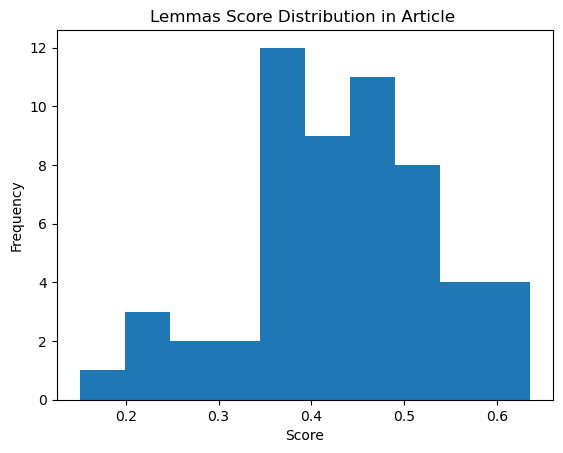

In [15]:
lemmas_scores = []
for sentence in list(doc.sents):
    score = score_sentence_by_lemma(sentence, frequent_lemmas)
    lemmas_scores.append(score)

plt.hist(lemmas_scores)
plt.title('Lemmas Score Distribution in Article ')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

# The most common range of lemmas scores is 0.35 to 0.38.

## Question 8

8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).

I chose the last items in each list generated. I chose "led" to be ommitted from the list of top 5 tokens, and "light" to be ommitted from the list of top 5 lemmas. I struggled with changing the code to consider only nouns, but was able to find a combination of approaches from internet sources and via fellow student repositories.

### Tokens with only nouns as interesting words

In [24]:
def significant_tokens_only_nouns(token):
    noun_list = ['NOUN', 'PRON', 'PROPN']
    return not (token.is_space or token.is_punct or token.is_stop or token.pos_ not in noun_list)

interesting_noun_tokens = [token.text.lower() for token in doc if significant_tokens_only_nouns(token)]

tokens_noun = Counter(interesting_noun_tokens)
freq_5tokens_noun = tokens_noun.most_common(5)

print('Token          Frequency')
for token, count in freq_5tokens_noun:
    print(f'{token:<10} {count:>9}')

Token          Frequency
laser             35
headlights        19
technology        10
headlight          9
beam               7


### Lemmas with only nouns as interesting words

In [28]:
interesting_noun_lemmas = [token.lemma_.lower() for token in doc if significant_tokens_only_nouns(token)]
lemmas_noun = Counter(interesting_noun_lemmas)
freq_5lemmas_noun = lemmas_noun.most_common(5)

print('Lemma          Frequency')
for lemma, count in freq_5lemmas_noun:
    print(f'{lemma:<10} {count:>9}')

Lemma          Frequency
laser             40
headlight         26
beam              12
technology        10
led                7
